# Calibration

## 1. Prerequisites

### 1.1 Chessboard object

See Chessboard notebook to create one chessboard object if he don't exist or load existing file with :

In [1]:
import alinea.phenomenal.plant_1

# Load chessboard object
chess_1, chess_2, _ = alinea.phenomenal.plant_1.plant_1_chessboards()

## 2. Calibrate

### 2.1 Do calibration

In [ ]:
from alinea.phenomenal.calibration import CalibrationCameraSideWith2Target

# Define size image of image chessboard to calibrate
size_image = (2056, 2454)

# Calibrate
calibration = CalibrationCameraSideWith2Target()
err = calibration.calibrate(chess_1.get_corners_2d(), 
                            chess_1.get_corners_local_3d(),
                            chess_2.get_corners_2d(), 
                            chess_2.get_corners_local_3d(),
                            size_image,
                            number_of_repetition=1)

print err

### 2.2 Dump & load

In [ ]:
# Dump
calibration.dump('calibration_camera_side_2_target')

In [4]:
from alinea.phenomenal.calibration import CalibrationCameraSideWith2Target

# Load 
calibration = CalibrationCameraSideWith2Target.load('calibration_camera_side_2_target')

print calibration

Camera Parameters : 
	Focal length X : 10953.9297033
	Focal length Y : 11070.3183916
	Optical Center X : 1028.0
	Optical Center Y : 1227.0

	Position X : -5938.20716426
	Position Y : -10652.8461558
	Position Z : 0.0

	Rotation X : 0.136815051698
	Rotation Y : 4.20033330978
	Rotation Z : 0.115532256605
	 Angle Factor : -1.01007979081
	Origin rotation position : 
[[ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]]

Target 1: 
	Position X : 87.2161114284
	Position Y : 228.334378579
	Position Z : -482.849629303

	Rotation X : 4.9732015376
	Rotation Y : 3.01754087327
	Rotation Z : 0.247568258988

Target 2: 
	Position X : -116.350986442
	Position Y : -230.751677022
	Position Z : -524.443500605

	Rotation X : 4.41043480019
	Rotation Y : 0.155817804164
	Rotation Z : 0.464498726637




### 2.6 Viewing calibration result

#### 2.6.1 Download dataset examples

Download the chessboard image dataset [here](https://gforge.inria.fr/frs/download.php/file/35019/CHESSBOARD_PhenoArch_2013_sv_face1.zip) and extract it. Indicate the path in **data_path_directory** variable below. 

In [5]:
data_path_directory = '../../local/CHESSBOARD_1/'

#### 2.6.1 Load path file from chessboard image dataset

In [6]:
import glob

# Load path files from directory
files_path = glob.glob(data_path_directory + '*.png')

# Extract angles from path files
angles = map(lambda x: int((x.split('_sv')[-1]).split('.png')[0]), files_path)

images_path = dict()
for i in range(len(files_path)):
    images_path[angles[i]] = files_path[i]

#### 2.6.2 Show chessboard image with corners projection

<IPython.core.display.Javascript object>


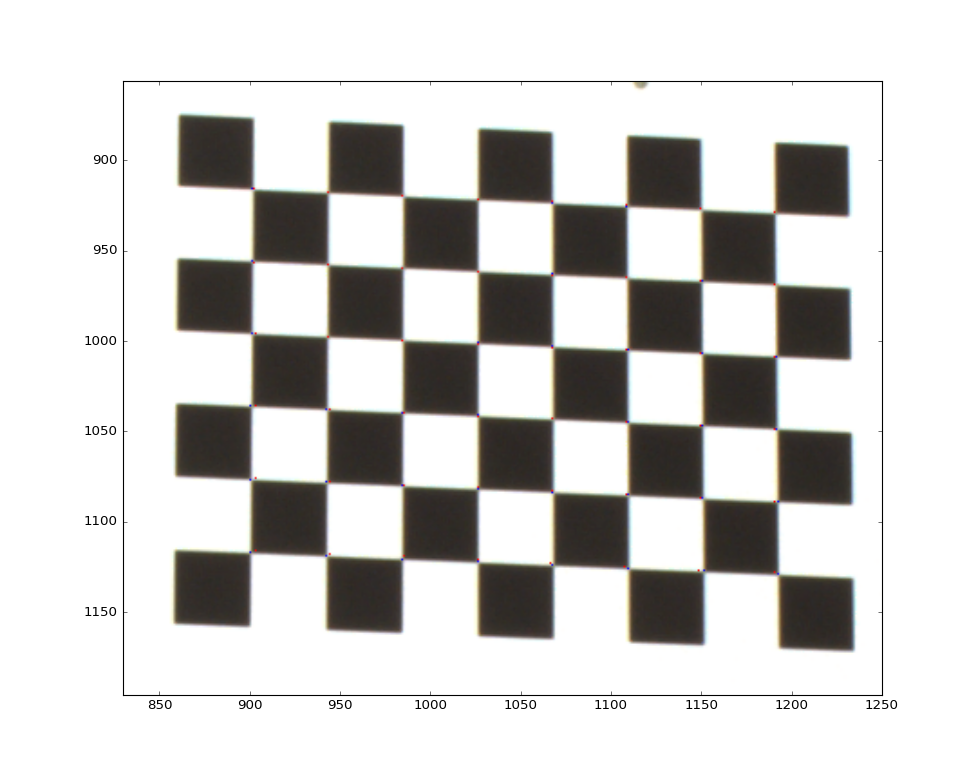

In [14]:
%matplotlib notebook

import matplotlib.pyplot

import cv2
import alinea.phenomenal.viewer

angle = 42
img = cv2.imread(images_path[angle], cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# BLUE POINTS ARE POINTS POSITIONS DETECTED BY OPENCV CHESSBOARD DETECTION 
pt_2d = chess_1.corners_points[angle].astype(int)
img[pt_2d[:, 0, 1], pt_2d[:, 0, 0]] = [0, 0, 255]

# RED POINTS ARE POINTS POSITIONS PROJECTED BY CALIBRATION CHESSBOARD COMPUTATION
points_2d = calibration.get_target_1_projected(angle, chess_1.get_corners_local_3d())
for x, y in points_2d:
    img[int(y), int(x)] = [255, 0, 0]


matplotlib.pyplot.figure()
matplotlib.pyplot.imshow(img)